In [479]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [480]:
amazon_reviews = pd.read_csv('Reviews.csv')
amazon_reviews.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [481]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [482]:
amazon_reviews = amazon_reviews[[ 'Id','ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',  'HelpfulnessDenominator', 'Score', 'Summary', 'Text' ]]

In [483]:
amazon_reviews.dropna(inplace = True)
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Summary                 568411 non-null  object
 8   Text                    568411 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [484]:
amazon_reviews.shape

(568411, 9)

In [485]:
reviews_df=amazon_reviews.drop_duplicates(subset={"UserId","ProfileName","Text"}, keep='first', inplace=False)
reviews_df.shape

(393633, 9)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [486]:
def partition(x):
    if x < 3:
        return 0
    return 1

finalScore = reviews_df['Score']

In [487]:
reviews_df.loc[:, 'target'] = reviews_df.Score.apply(partition)
#reviews_df['Score'] = reviews_df['Score'].apply(partition)

/Users/nainika/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/nainika/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


/Users/nainika/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


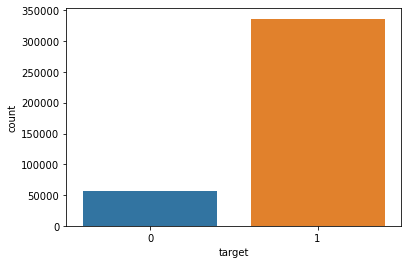

In [488]:

sns.countplot(reviews_df['target'])
plt.show()

In [489]:
 reviews_df['reviews'] = reviews_df['Text'] + " " + reviews_df['Summary']

<ipython-input-489-6780a6141e42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['reviews'] = reviews_df['Text'] + " " + reviews_df['Summary']


In [295]:
reviews_df['reviews'].values[4900]

"I've suffered from recurrent bouts of acute sinusitis that have only become worse and worse over the years. Every time I get an infection, my right maxillary sinus swells up like a balloon. Sleeping at night on account of this condition is terribly difficult; I often have to resort to using Afrin to decongest my sinuses, which is effective but also very painful and not a realistic, long term solution because of rebound congestion. Now I already irrigate with a motorized system, often upwards of 8-10X daily when I'm sick, and drinking herbal tea has also become a pasttime to help cope with my sinus disease. That being said, I bought this tea out of sheer desperation. I'll try (and have tried) next to anything to give myself some relief while I wait for antibiotics to take effect. The only thing which I find works even close to as well as Afrin is to megadose on Psuedoephedrine (240 1-2 times per day), which is something that is also unsustainable. So, keep in mind that the severity of 

In [490]:
#it was observed that helfulness numerator is greater than helpfulness denominator 
reviews_df=reviews_df[reviews_df.HelpfulnessNumerator<=reviews_df.HelpfulnessDenominator]
reviews_df.head()
reviews_df.shape

(393631, 11)

In [491]:
# Text Preprocessing
import re

In [492]:
def cleanhtml(review): #function to clean html tags in a sentence
    htmlclean=re.compile('<.*?>')
    clean=re.sub(htmlclean,'',review)
    return clean
reviews_df['reviews'] = reviews_df['reviews'].apply(cleanhtml)

In [493]:
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,target,reviews
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,1,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,0,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,1,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...,1,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...,0,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,1,These are the BEST treats for training and rew...


In [494]:
# text pre-processing
import string
from nltk.corpus import stopwords

In [495]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nainika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [496]:
def removePunc(review):
        
    nopunctuation = [char for char in review if char not in string.punctuation]
    
    nopunctuation = ''.join(nopunctuation)
    
    return nopunctuation

In [497]:
reviews_df['reviews'] = reviews_df['reviews'].apply(removePunc)

In [498]:
reviews_df['reviews'].values[1200]

'These are tiny packets I bought them thinking they were the regular size and are not My kids love the product but this particular package was outrageously expensive for tiny packages I sent them back Mini Mini is right'

In [499]:
#convert to lowercase
reviews_df['reviews'] = reviews_df['reviews'].apply(lambda x:x.lower())

In [500]:
reviews_df['reviews'].values[1200]

'these are tiny packets i bought them thinking they were the regular size and are not my kids love the product but this particular package was outrageously expensive for tiny packages i sent them back mini mini is right'

In [501]:
alphanumeric_filter = filter(str.isalnum, reviews_df['reviews'])
alphanumeric_string = "".join(alphanumeric_filter)
print(alphanumeric_string)

In [502]:
reviews_df['reviews'].values[1200]

'these are tiny packets i bought them thinking they were the regular size and are not my kids love the product but this particular package was outrageously expensive for tiny packages i sent them back mini mini is right'

In [503]:
#remove urls
reviews_df['reviews'] = reviews_df['reviews'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [504]:
#remove stop words
stopwords = nltk.corpus.stopwords.words('english')
def remStopWords(remWord):
    clean_txt = [word for word in remWord.split() if word not in stopwords]
    return clean_txt

In [505]:
reviews_df['reviews_test'] = reviews_df['reviews'].apply(remStopWords)

In [506]:
reviews_df['reviews_test'].values[1200]

['tiny',
 'packets',
 'bought',
 'thinking',
 'regular',
 'size',
 'kids',
 'love',
 'product',
 'particular',
 'package',
 'outrageously',
 'expensive',
 'tiny',
 'packages',
 'sent',
 'back',
 'mini',
 'mini',
 'right']

In [507]:
#stemming
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [508]:
def stem(text):
    li = []
    for i in text:
        li.append(ps.stem(i))
        
    return " ".join(li)

In [509]:
reviews_df['reviews_test'] = reviews_df['reviews_test'].apply(stem)

In [510]:
reviews_df['reviews_test'].values[1200]

'tini packet bought think regular size kid love product particular packag outrag expens tini packag sent back mini mini right'

In [511]:
reviews_df['reviews_test']

0         bought sever vital can dog food product found ...
1         product arriv label jumbo salt peanutsth peanu...
2         confect around centuri light pillowi citru gel...
3         look secret ingredi robitussin believ found go...
4         great taffi great price wide assort yummi taff...
                                ...                        
568449    great sesam chickenthi good better restur eate...
568450    im disappoint flavor chocol note especi weak m...
568451    star small give 1015 one train session tri tra...
568452    best treat train reward dog good groom lower c...
568453    satisfi product advertis use cereal raw vinega...
Name: reviews_test, Length: 393631, dtype: object

In [512]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [513]:
#train test split

X = reviews_df.reviews_test
y = reviews_df.target

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.30, random_state=1, stratify=y)

In [514]:
X_train.shape, X_test.shape

((275541,), (118090,))

In [515]:
# tranform tfidf 

tfidf_v = TfidfVectorizer(max_features=10000)
tfidf_v.fit(X_train)

# transform
tfidf_X_train = tfidf_v.transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [524]:
# logistic regression
model = LogisticRegression( max_iter=500)
model.fit(tfidf_X_train, y_train)

LogisticRegression(max_iter=500)

In [525]:
# predictions
y_pred_train = model.predict(tfidf_X_train)
y_pred_test = model.predict(tfidf_X_test)

In [530]:
#check accuracy score 
print(f"Train accuracy score : {accuracy_score(y_train, y_pred_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_pred_test)}")

Train accuracy score : 0.9283446020737386
Test accuracy score : 0.9222796172410873
